# Lead Scoring Case Study

In [1]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Importing ML packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

## Loading and Cleaning Data

### Data import and basic sanity check

In [2]:
# Loading the data using Pandas
pd.set_option("display.max_columns",100)
df_leads = pd.read_csv('Leads.csv')
df_leads.shape

(9240, 37)

In [3]:
df_leads.head(20)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [4]:
## there is multiple values having select as dropdown, replacing them by null
df_leads = df_leads.replace('Select',np.nan)

In [5]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
## Getting percentage of null entries and filtering out if there is any missing data
missing_values=round(df_leads.isna().sum()* 100 / len(df_leads),1)
missing_values=pd.DataFrame(missing_values).reset_index()
missing_values.columns=['attributes','missing_percentage']
missing_values[missing_values['missing_percentage']>0]

,attributes,missing_percentage
3,Lead Source,0.4
7,TotalVisits,1.5
9,Page Views Per Visit,1.5
10,Last Activity,1.1
11,Country,26.6
12,Specialization,36.6
13,How did you hear about X Education,78.5
14,What is your current occupation,29.1
15,What matters most to you in choosing a course,29.3
24,Tags,36.3


In [7]:
## Checking if prefex Asymmetrique has any relevent impact on conversion
## Creating function to check

def asym_relevent_check(df,column):
    df1=df.copy()
    df1[column]=np.where(df1[column].isna(),'null',df1[column])
    df1=df1.groupby(column)['Converted'].agg({'sum','count'})
    df1.columns=['Converted','Leads']
    df1['conversion_percent']=round(df1['Converted']/df1['Leads']*100)
    return df1

In [8]:
asym_relevent_check(df_leads,'Asymmetrique Activity Index')

,Converted,Leads,conversion_percent
Asymmetrique Activity Index,,,
01.High,245,821,30.0
02.Medium,1630,3839,42.0
03.Low,33,362,9.0
null,1653,4218,39.0


In [9]:
asym_relevent_check(df_leads,'Asymmetrique Profile Index')

,Converted,Leads,conversion_percent
Asymmetrique Profile Index,,,
01.High,1045,2203,47.0
02.Medium,848,2788,30.0
03.Low,15,31,48.0
null,1653,4218,39.0


In [10]:
asym_relevent_check(df_leads,'Asymmetrique Activity Score')

,Converted,Leads,conversion_percent
Asymmetrique Activity Score,,,
10.0,3,57,5.0
11.0,7,95,7.0
12.0,23,196,12.0
13.0,98,775,13.0
14.0,710,1771,40.0
15.0,822,1293,64.0
16.0,228,467,49.0
17.0,17,349,5.0
18.0,0,5,0.0


In [11]:
asym_relevent_check(df_leads,'Asymmetrique Profile Score')

,Converted,Leads,conversion_percent
Asymmetrique Profile Score,,,
11.0,5,9,56.0
12.0,10,22,45.0
13.0,48,204,24.0
14.0,57,226,25.0
15.0,500,1759,28.0
16.0,243,599,41.0
17.0,262,579,45.0
18.0,383,1071,36.0
19.0,182,245,74.0


In [12]:
## ALL Asymmetrique___ data is giving mixed conversion and also missing values are way more

## Removing all attributes where missing value percentage is more than 30%

columns_missing_30per=missing_values[missing_values['missing_percentage']>30]['attributes']
df_leads.drop(columns_missing_30per,axis=1,inplace=True)
df_leads.shape

(9240, 27)

In [13]:
### Finding out attributes where only one value exists
unique_attribute=df_leads.nunique()
unique_attribute=pd.DataFrame(unique_attribute).reset_index()
unique_attribute.columns=['attributes','unique_values']
unique_attribute[unique_attribute['unique_values']==1]

,attributes,unique_values
15,Magazine,1
21,Receive More Updates About Our Courses,1
22,Update me on Supply Chain Content,1
23,Get updates on DM Content,1
24,I agree to pay the amount through cheque,1


In [14]:
## Removing attributes having only one value
unique=unique_attribute[unique_attribute['unique_values']==1]['attributes']
df_leads.drop(unique,axis=1,inplace=True)
df_leads.shape

(9240, 22)

### Missing values imputation having missing less than 30%

In [15]:
missing_values=round(df_leads.isna().sum()* 100 / len(df_leads),1)
missing_values=pd.DataFrame(missing_values).reset_index()
missing_values.columns=['attributes','missing_percentage']
missing_values[missing_values['missing_percentage']>0]http://localhost:8966/notebooks/Lead%20Score%20Case%20Study%20Sumit.ipynb#Missing-values-imputation-having-missing-less-than-30%

,attributes,missing_percentage
3,Lead Source,0.4
7,TotalVisits,1.5
9,Page Views Per Visit,1.5
10,Last Activity,1.1
11,Country,26.6
12,What is your current occupation,29.1
13,What matters most to you in choosing a course,29.3


#### Missing value imputation function

In [16]:

## For the simplicity let's impute 'int' & 'float' with median and 'str' with mode
def missing_imputation(df,column):
    if (df[column].dtypes=='int64') or  (df[column].dtypes=='float64'):
        x=round(df[column].mean(),1)
    else:
        x=df[column].mode()
    df[column]=np.where(df[column].isna(),x,df[column])
    return df

In [17]:
df_leads=missing_imputation(df_leads,'Lead Source')
df_leads=missing_imputation(df_leads,'TotalVisits')
df_leads=missing_imputation(df_leads,'Page Views Per Visit')
df_leads=missing_imputation(df_leads,'Last Activity')
df_leads=missing_imputation(df_leads,'Country')
df_leads=missing_imputation(df_leads,'What is your current occupation')
df_leads=missing_imputation(df_leads,'What matters most to you in choosing a course')

In [18]:
## Checking for missing values post imputattion
df_leads.isna().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [19]:
for c in df_leads:
    print(df_leads[c].astype('category').value_counts())
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
    print('                                                ')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
                                                
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
                                                
Landing Page Submission    4886
API                        3580
Lead Add Form           

In [20]:
### Removing all unrelevant as values are heavily biased

df_leads.drop(['Prospect ID','Lead Number','Do Not Call','Country',
               'What matters most to you in choosing a course','Search',
              'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
              'Through Recommendations'],axis=1,inplace=True)

In [21]:
## Converting yes/no into 1,0 to avoid dummy value creation

## listing down all yes/no data
df_binary=pd.DataFrame(df_leads.nunique()).reset_index()
df_binary.columns=['attributes','no_of_values']
binary_columns=df_binary[df_binary['no_of_values']==2]['attributes']

df_leads[binary_columns]
binary_columns=list(binary_columns)

In [22]:
## removing 'converted' as it is already in 1/0 format and also our target variable
binary_columns.remove('Converted')

In [23]:
for i in binary_columns:
    df_leads[i]=np.where(df_leads[i]=='No',0,1)

In [24]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


In [25]:
## Checking if all biased columns are removed
for c in df_leads:
    print(df_leads[c].astype('category').value_counts())
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
    print('                                                ')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
                                                
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
                                                
0   

In [26]:
#To get an idea of the numeric values
df_leads.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.385390,3.444567,487.698268,2.363371,0.312554
std,0.270435,0.486714,4.818726,548.021466,2.145337,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000
75%,0.000000,1.000000,5.000000,936.000000,3.000000,1.000000
max,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000


#### Identifying Outlier in continuous attributes

we can see,their are outliers in TotalVisits,Total Time Spent on Website & Page Views Per Visit

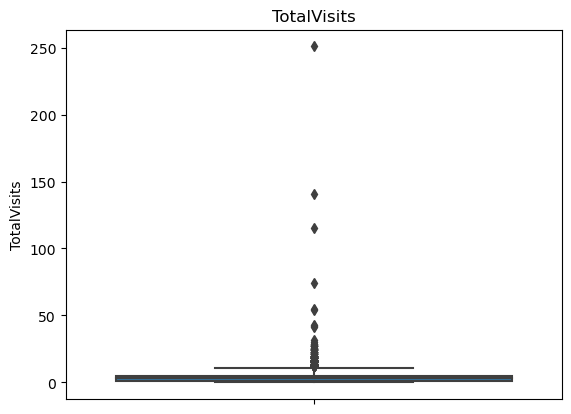

In [27]:
sns.boxplot(y = 'TotalVisits', data = df_leads).set(title='TotalVisits')
plt.show()

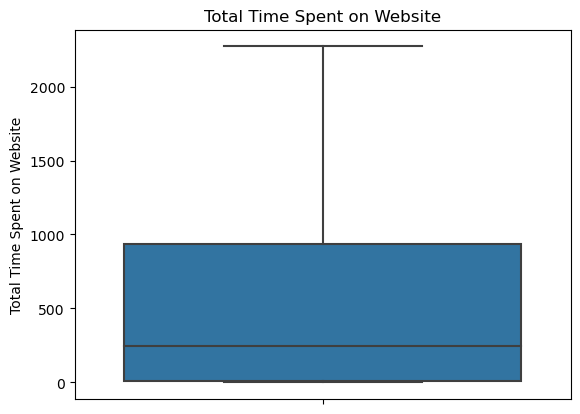

In [28]:
sns.boxplot(y = 'Total Time Spent on Website', data = df_leads).set(title='Total Time Spent on Website')
plt.show()

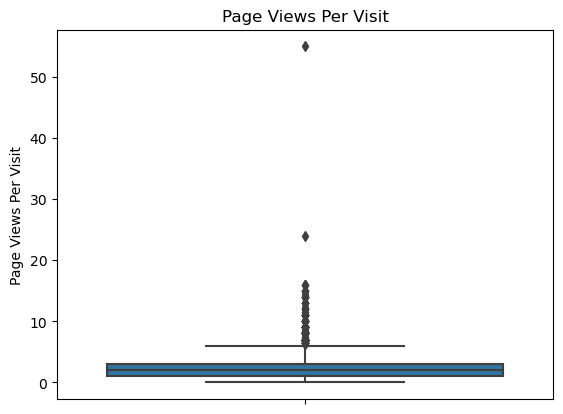

In [29]:
sns.boxplot(y = 'Page Views Per Visit', data = df_leads).set(title='Page Views Per Visit')
plt.show()

In [30]:
## cliping outliers to 95th percentile for TotalVisits

p0 = df_leads['TotalVisits'].quantile(0) # 5th quantile
p_95 = df_leads['TotalVisits'].quantile(0.95) # 95th quantile

df_leads['TotalVisits'].clip(p0, p_95, inplace=True)

In [31]:
## cliping outliers to 95th percentile for Page Views Per Visit

p0 = df_leads['Page Views Per Visit'].quantile(0) # 5th quantile
p_95 = df_leads['Page Views Per Visit'].quantile(0.95) # 95th quantile

df_leads['Page Views Per Visit'].clip(p0, p_95, inplace=True)

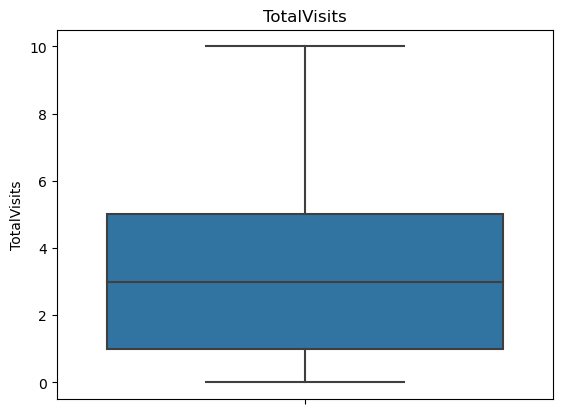

In [32]:
sns.boxplot(y = 'TotalVisits', data = df_leads).set(title='TotalVisits')
plt.show()

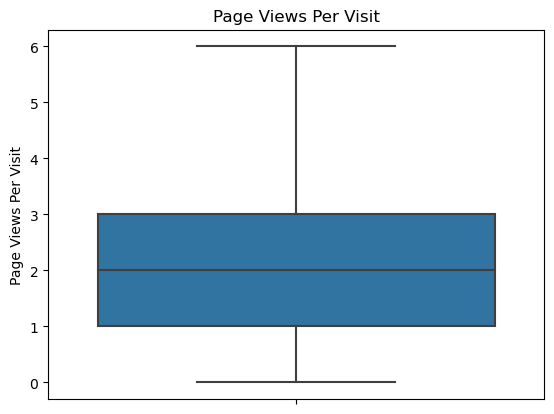

In [33]:
sns.boxplot(y = 'Page Views Per Visit', data = df_leads).set(title='Page Views Per Visit')
plt.show()

# EDA

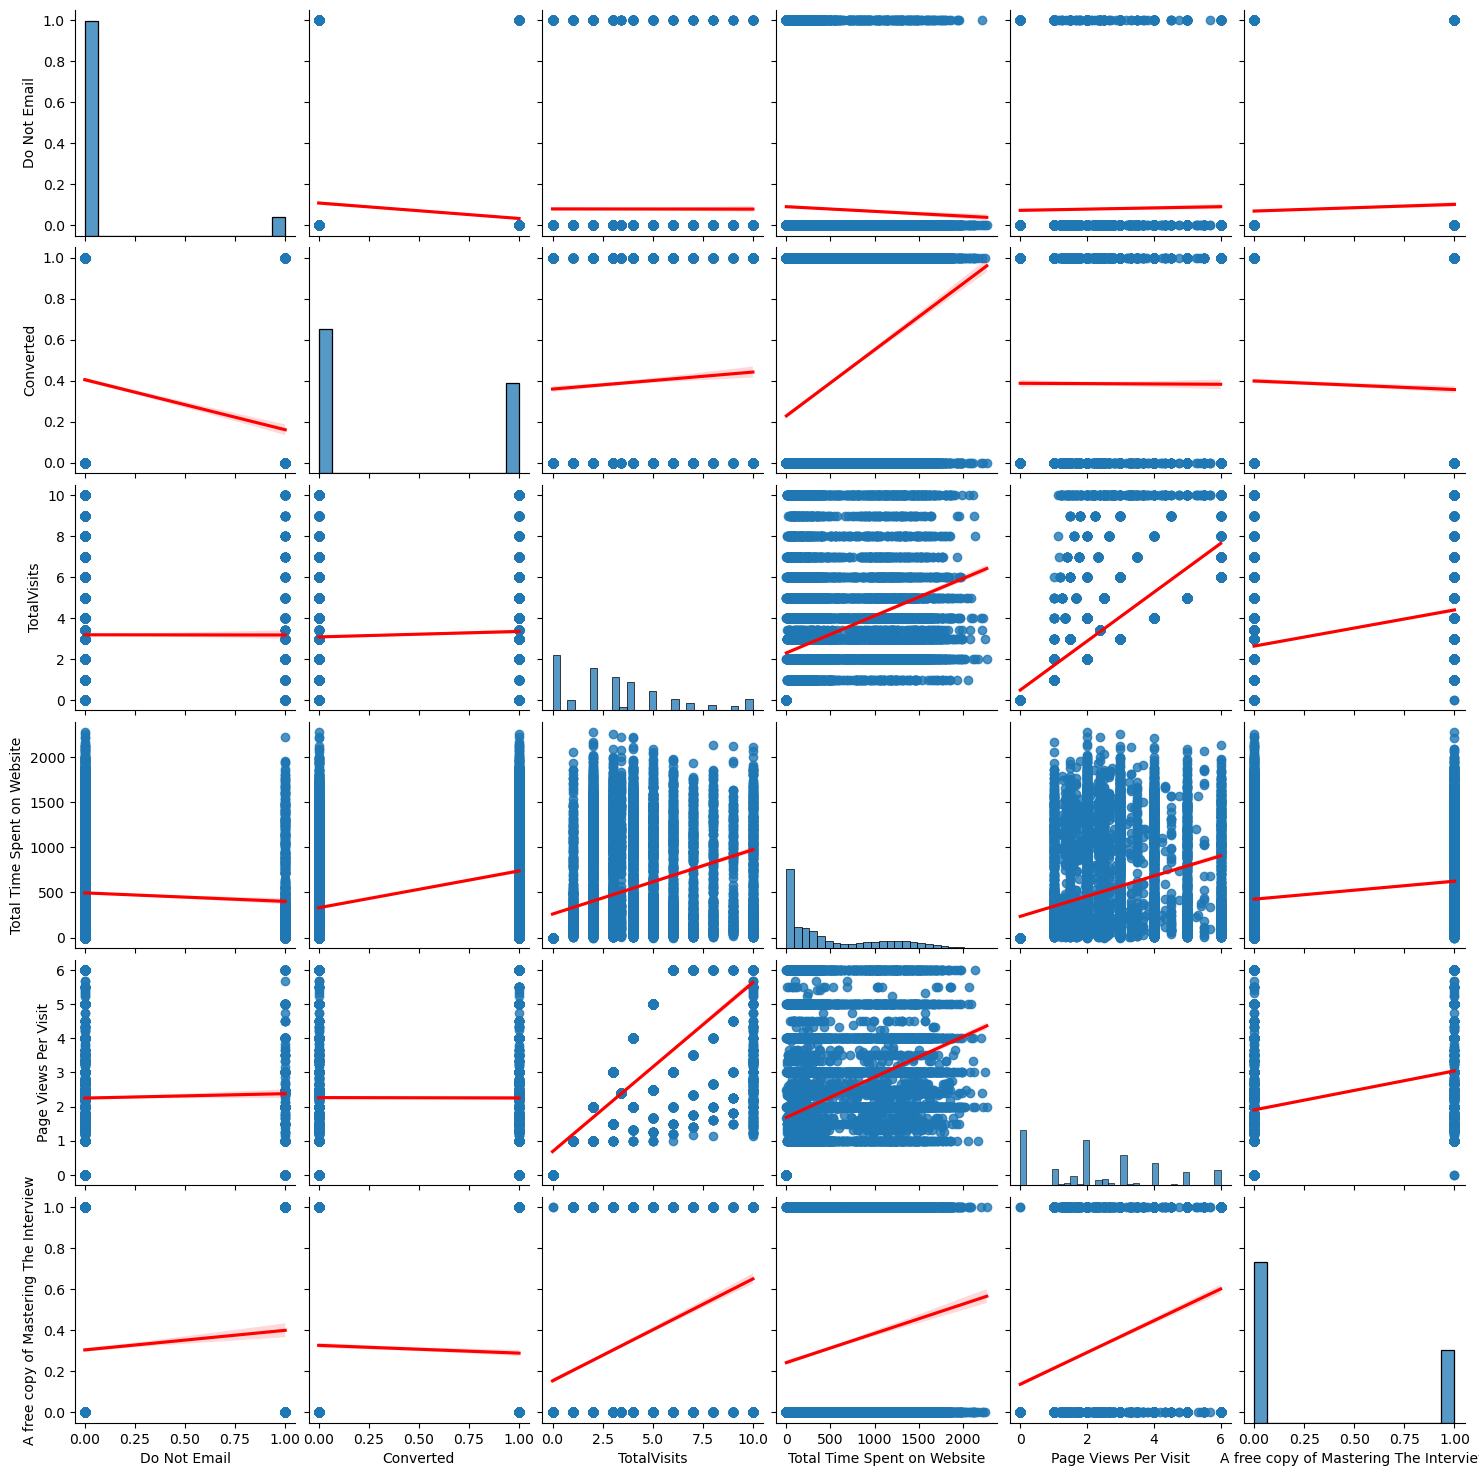

In [34]:
sns.pairplot(data=df_leads,kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

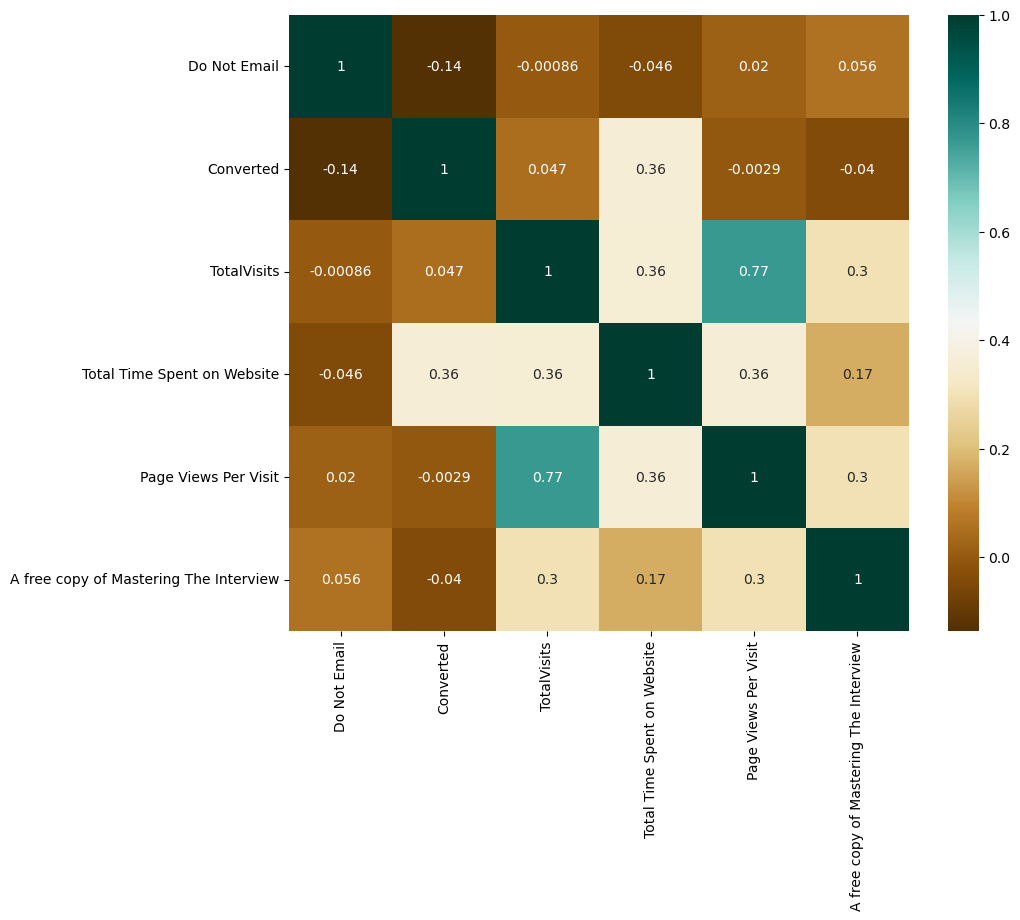

In [35]:
# Verifying with the help of corelation

# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df_leads.corr(), annot=True,cmap="BrBG")
plt.show()

#### conversion is showing positive relation with TotalVisits and Total Time Spent on Website is showing positive relation.

will check it while doing feature selection based on p-value and VIF

### Analysing all categorical variable

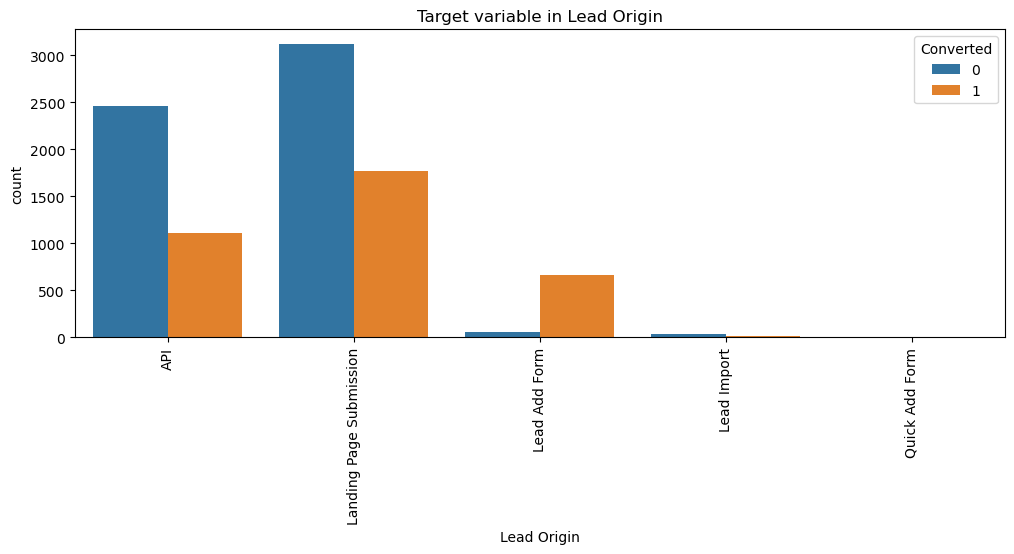

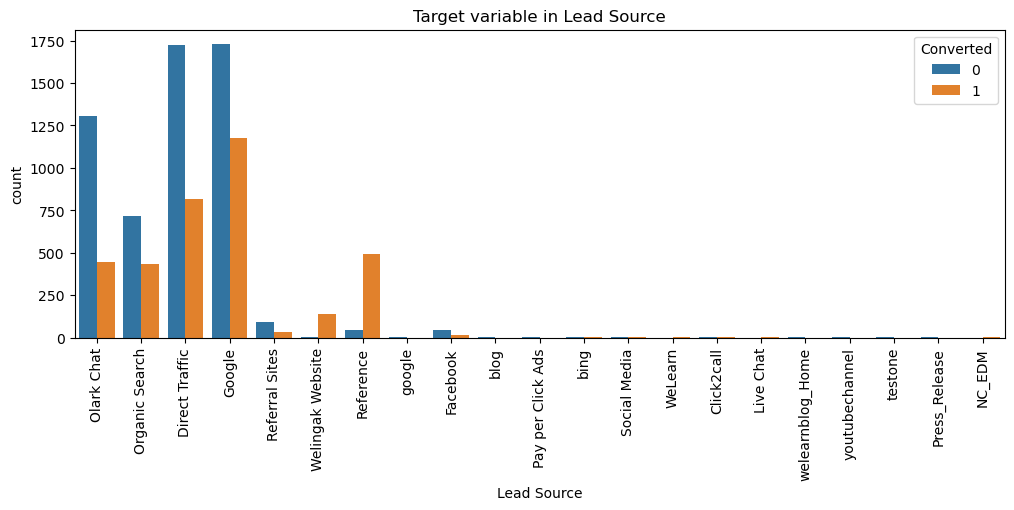

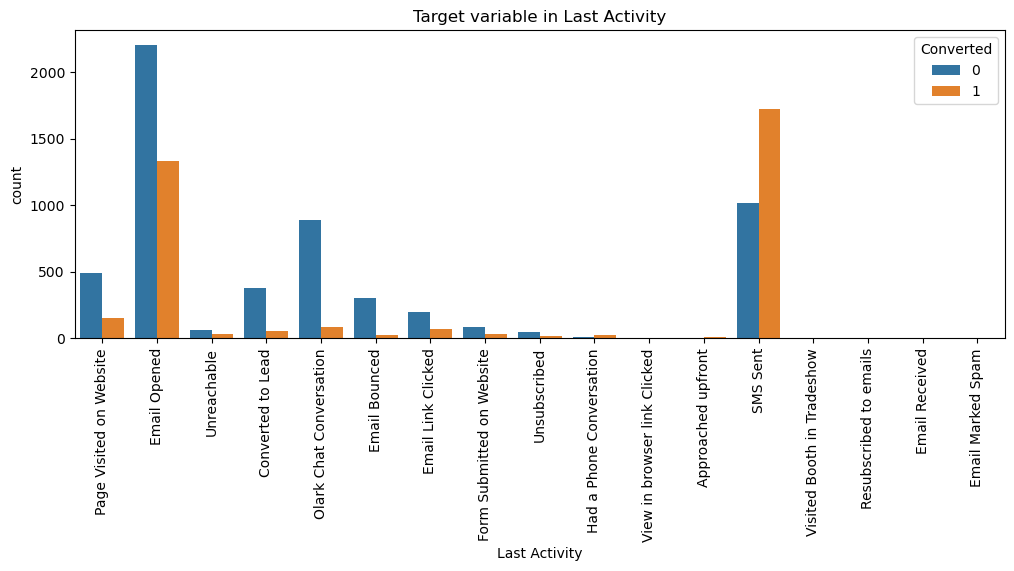

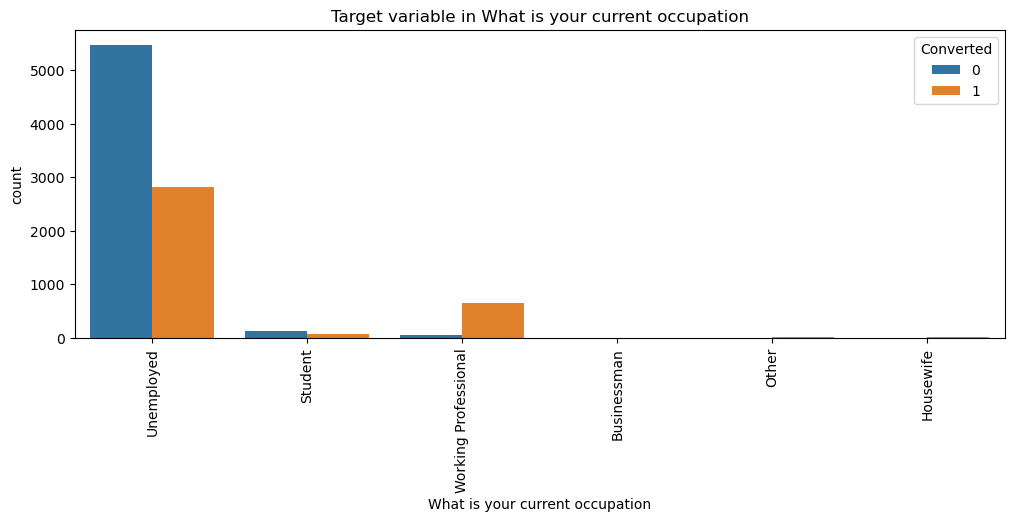

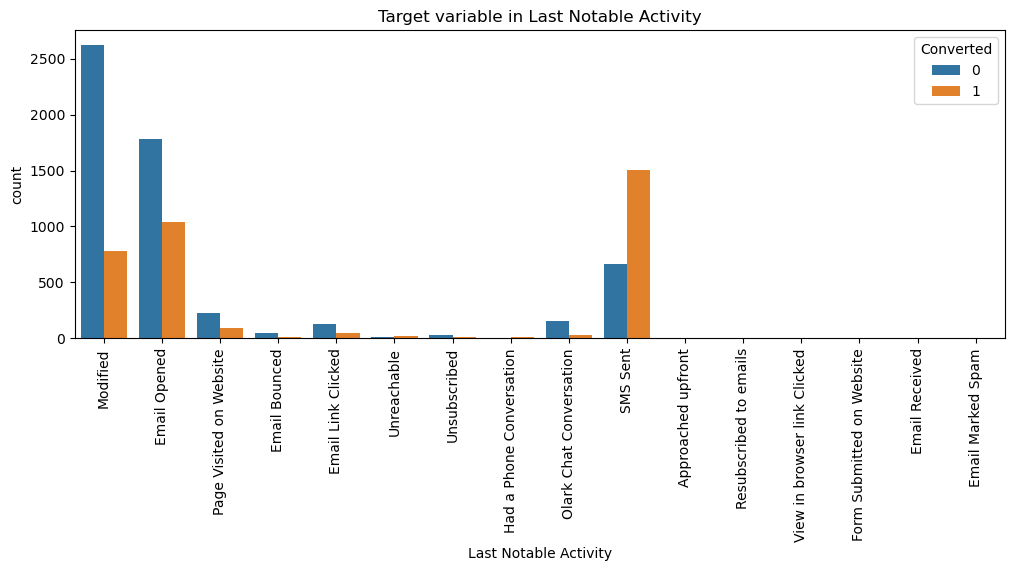

In [36]:
cat_vars= df_leads.select_dtypes(include ="object").columns
for i in cat_vars:
    plt.figure(figsize =(12,4))
    sns.countplot(x=df_leads[i],data=df_leads,hue=df_leads['Converted'])
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

#### Findings from Categorical vvariables
     - Conversion rate of leads coming from Lead Add form is significantly high
     - Conversion of Leads coming through reference has very high conversion
     - Last activity and last notable activity seems very similar 
     - Conversion of working professional is high compare to other segment

### Dummy value creating

In [37]:
# Checking the columns which are of type 'object'

dummy_colmn = df_leads.loc[:, df_leads.dtypes == 'object']
dummy_colmn.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [38]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(df_leads[['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [39]:
### Dropping cateegorical variables
df_leads.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],axis=1,inplace=True)

### Final Data for model Evaluation

In [40]:
df_leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0




## Model Evaluation

#### Splitting Data into training and Testing

In [41]:
X = df_leads.drop(['Converted'], 1)
y = df_leads['Converted']

In [42]:
# Spliting the dataset into 75% train and 25% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

### MinMax scaling
    - scaling numerical valriables to bring it at comparative views

In [43]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3819,0,3.0,138,3.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6160,0,2.0,737,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
642,0,6.0,356,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
176,0,2.0,383,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9156,0,4.0,336,4.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [44]:
cols_to_scale=['Total Time Spent on Website','Page Views Per Visit','TotalVisits']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3819,0,0.3,0.060739,0.500000,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6160,0,0.2,0.324384,0.333333,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
642,0,0.6,0.156690,0.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
176,0,0.2,0.168574,0.333333,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9156,0,0.4,0.147887,0.666667,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [45]:
# Creating a regressor to be used in RFE
logreg = LogisticRegression()

#### Implementing RFE to reduce features

In [46]:

rfe = RFE(logreg, n_features_to_select=15) # selecting only top 15 features
rfe = rfe.fit(X_train, y_train)

In [47]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', False, 43),
 ('Lead Origin_Landing Page Submission', False, 40),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 34),
 ('Lead Origin_Quick Add Form', False, 14),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 35),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Live Chat', False, 39),
 ('Lead Source_NC_EDM', False, 30),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 46),
 ('Lead Source_Reference', False, 29),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Social Media', False, 9),
 ('Lead Source_WeLearn', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 18),
 ('Lead Source_blog', Fa

In [48]:
# selecting columns based on RFE

col = X_train.columns[rfe.support_]

X_train = X_train[col]

In [49]:
X_train.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3819,0,0.060739,0,0,0,0,0,1,0,0,1,0,0,0,0
6160,0,0.324384,0,0,0,0,0,1,0,0,0,0,1,0,0
642,0,0.156690,0,0,0,0,0,1,0,0,1,0,0,0,0
176,0,0.168574,0,0,0,0,0,1,0,1,0,0,0,0,0
9156,0,0.147887,0,0,0,0,0,1,0,0,1,0,0,0,0


In [50]:
### Adding a constant in X_train

X_train_sm = sm.add_constant(X_train)

In [51]:
### Fitting model and looking into summary

lof_reg = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = lof_reg.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6914
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2969.0
Date:                Mon, 07 Aug 2023   Deviance:                       5938.0
Time:                        00:35:57   Pearson chi2:                 7.01e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3777
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6737      0.573      2.920      0.003       0.550       2.797
Do Not Email                                            -1.7402      0.156    -11.172      0.000      -2.046      -1.435
Total Time Spent on Website                              3.8554      0.138     27.902      0.000       3.585       4.126
Lead Origin_Lead Add Form                                3.2651      0.185     17.666      0.000       2.903       3.627
Lead Source_Welingak Website                            22.7413   1.33e+04      0.002      0.999   -2.61e+04    2.61e+04
Last Activity_Converted to Lead                         -1.0548      0.199     -5.292      0.000      -1.446      -0.664
Last Activity_Olark Chat Conversation                   -0.8573      0.177     -4.852      0.000      -1.204      -0.511
What is your current occupation_Student                 -1.6958      0.609     -2.786      0.005      -2.889      -0.503
What is your current occupation_Unemployed              -2.0539      0.569     -3.608      0.000      -3.170      -0.938
What is your current occupation_Working Professional     0.5802      0.594      0.977      0.329      -0.584       1.744
Last Notable Activity_Email Link Clicked                -1.7371      0.246     -7.064      0.000      -2.219      -1.255
Last Notable Activity_Email Opened                      -1.4962      0.084    -17.859      0.000      -1.660      -1.332
Last Notable Activity_Had a Phone Conversation           1.8801      1.073      1.751      0.080      -0.224       3.984
Last Notable Activity_Modified                          -1.7498      0.094    -18.593      0.000      -1.934      -1.565
Last Notable Activity_Olark Chat Conversation           -1.6364      0.353     -4.632      0.000      -2.329      -0.944
Last Notable Activity_Page Visited on Website           -1.6875      0.180     -9.372      0.000      -2.040      -1.335
========================================================================================================================
"""

In [52]:
### Calculating VIF

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif = vif.sort_values(by = "VIF Factor", ascending = False)
vif.round(1)

,VIF Factor,features
7,5.4,What is your current occupation_Unemployed
12,3.1,Last Notable Activity_Modified
10,2.3,Last Notable Activity_Email Opened
1,1.9,Total Time Spent on Website
5,1.8,Last Activity_Olark Chat Conversation
8,1.4,What is your current occupation_Working Profes...
2,1.4,Lead Origin_Lead Add Form
13,1.4,Last Notable Activity_Olark Chat Conversation
4,1.2,Last Activity_Converted to Lead
3,1.2,Lead Source_Welingak Website


#### Deleting 'Lead Source_Welingak Website' basis high Vif

In [53]:
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

### Model Fit #2

In [54]:
log_reg2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_reg2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6915
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2976.8
Date:                Mon, 07 Aug 2023   Deviance:                       5953.5
Time:                        00:35:58   Pearson chi2:                 7.03e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3763
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3807      0.070     -5.413      0.000      -0.518      -0.243
Do Not Email                                            -1.7468      0.156    -11.212      0.000      -2.052      -1.441
Total Time Spent on Website                              3.8607      0.138     27.970      0.000       3.590       4.131
Lead Origin_Lead Add Form                                3.2905      0.184     17.838      0.000       2.929       3.652
Lead Source_Welingak Website                            22.7100   1.33e+04      0.002      0.999   -2.61e+04    2.62e+04
Last Activity_Converted to Lead                         -1.0649      0.199     -5.344      0.000      -1.455      -0.674
Last Activity_Olark Chat Conversation                   -0.8487      0.176     -4.823      0.000      -1.194      -0.504
What is your current occupation_Student                  0.3464      0.223      1.556      0.120      -0.090       0.783
What is your current occupation_Working Professional     2.6248      0.176     14.903      0.000       2.280       2.970
Last Notable Activity_Email Link Clicked                -1.7270      0.245     -7.060      0.000      -2.206      -1.248
Last Notable Activity_Email Opened                      -1.4850      0.084    -17.750      0.000      -1.649      -1.321
Last Notable Activity_Had a Phone Conversation           1.8798      1.074      1.751      0.080      -0.224       3.984
Last Notable Activity_Modified                          -1.7399      0.094    -18.516      0.000      -1.924      -1.556
Last Notable Activity_Olark Chat Conversation           -1.6457      0.353     -4.662      0.000      -2.338      -0.954
Last Notable Activity_Page Visited on Website           -1.6765      0.180     -9.310      0.000      -2.029      -1.324
========================================================================================================================
"""

In [55]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif = vif.sort_values(by = "VIF Factor", ascending = False)
vif.round(1)

,VIF Factor,features
11,2.0,Last Notable Activity_Modified
5,1.8,Last Activity_Olark Chat Conversation
1,1.5,Total Time Spent on Website
2,1.4,Lead Origin_Lead Add Form
12,1.3,Last Notable Activity_Olark Chat Conversation
9,1.2,Last Notable Activity_Email Opened
4,1.2,Last Activity_Converted to Lead
3,1.2,Lead Source_Welingak Website
7,1.2,What is your current occupation_Working Profes...
0,1.1,Do Not Email


### Model Fit #3 ( After dropping 'Lead Source_Welingak Website' due to high p-values)

In [56]:
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)
log_reg3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_reg3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6916
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2988.0
Date:                Mon, 07 Aug 2023   Deviance:                       5976.0
Time:                        00:35:58   Pearson chi2:                 7.31e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3742
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3795      0.070     -5.398      0.000      -0.517      -0.242
Do Not Email                                            -1.7423      0.155    -11.239      0.000      -2.046      -1.438
Total Time Spent on Website                              3.8565      0.138     27.940      0.000       3.586       4.127
Lead Origin_Lead Add Form                                3.5971      0.181     19.885      0.000       3.243       3.952
Last Activity_Converted to Lead                         -1.0641      0.199     -5.344      0.000      -1.454      -0.674
Last Activity_Olark Chat Conversation                   -0.8493      0.176     -4.829      0.000      -1.194      -0.505
What is your current occupation_Student                  0.3274      0.224      1.459      0.145      -0.112       0.767
What is your current occupation_Working Professional     2.6109      0.176     14.795      0.000       2.265       2.957
Last Notable Activity_Email Link Clicked                -1.7277      0.244     -7.068      0.000      -2.207      -1.249
Last Notable Activity_Email Opened                      -1.4848      0.084    -17.761      0.000      -1.649      -1.321
Last Notable Activity_Had a Phone Conversation           1.8794      1.073      1.751      0.080      -0.225       3.983
Last Notable Activity_Modified                          -1.7385      0.094    -18.532      0.000      -1.922      -1.555
Last Notable Activity_Olark Chat Conversation           -1.6455      0.353     -4.661      0.000      -2.338      -0.954
Last Notable Activity_Page Visited on Website           -1.6722      0.180     -9.309      0.000      -2.024      -1.320
========================================================================================================================
"""

In [57]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif = vif.sort_values(by = "VIF Factor", ascending = False)
vif.round(1)

,VIF Factor,features
10,2.0,Last Notable Activity_Modified
4,1.8,Last Activity_Olark Chat Conversation
1,1.5,Total Time Spent on Website
11,1.3,Last Notable Activity_Olark Chat Conversation
8,1.2,Last Notable Activity_Email Opened
3,1.2,Last Activity_Converted to Lead
6,1.2,What is your current occupation_Working Profes...
2,1.1,Lead Origin_Lead Add Form
0,1.1,Do Not Email
12,1.0,Last Notable Activity_Page Visited on Website


### Model Fit #4 ( After dropping 'What is your current occupation_Student' due to high p-values)

In [58]:
X_train.drop('What is your current occupation_Student', axis = 1, inplace = True)
log_reg4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_reg4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6917
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2989.0
Date:                Mon, 07 Aug 2023   Deviance:                       5978.1
Time:                        00:35:58   Pearson chi2:                 7.32e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3741
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3757      0.070     -5.349      0.000      -0.513      -0.238
Do Not Email                                            -1.7422      0.155    -11.233      0.000      -2.046      -1.438
Total Time Spent on Website                              3.8550      0.138     27.936      0.000       3.585       4.126
Lead Origin_Lead Add Form                                3.6037      0.181     19.935      0.000       3.249       3.958
Last Activity_Converted to Lead                         -1.0609      0.199     -5.326      0.000      -1.451      -0.670
Last Activity_Olark Chat Conversation                   -0.8444      0.176     -4.803      0.000      -1.189      -0.500
What is your current occupation_Working Professional     2.6035      0.176     14.761      0.000       2.258       2.949
Last Notable Activity_Email Link Clicked                -1.7234      0.245     -7.047      0.000      -2.203      -1.244
Last Notable Activity_Email Opened                      -1.4794      0.083    -17.725      0.000      -1.643      -1.316
Last Notable Activity_Had a Phone Conversation           1.8758      1.073      1.747      0.081      -0.228       3.980
Last Notable Activity_Modified                          -1.7362      0.094    -18.513      0.000      -1.920      -1.552
Last Notable Activity_Olark Chat Conversation           -1.6470      0.353     -4.663      0.000      -2.339      -0.955
Last Notable Activity_Page Visited on Website           -1.6651      0.179     -9.281      0.000      -2.017      -1.313
========================================================================================================================
"""

In [59]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif = vif.sort_values(by = "VIF Factor", ascending = False)
vif.round(1)

,VIF Factor,features
9,2.0,Last Notable Activity_Modified
4,1.8,Last Activity_Olark Chat Conversation
1,1.5,Total Time Spent on Website
10,1.3,Last Notable Activity_Olark Chat Conversation
7,1.2,Last Notable Activity_Email Opened
3,1.2,Last Activity_Converted to Lead
5,1.2,What is your current occupation_Working Profes...
2,1.1,Lead Origin_Lead Add Form
0,1.1,Do Not Email
11,1.0,Last Notable Activity_Page Visited on Website


### Model Fit #5 ( After dropping 'Last Notable Activity_Had a Phone Conversation' due to high p-values)

In [60]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)
log_reg5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logreg_final=log_reg5.fit()
logreg_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6918
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2991.4
Date:                Mon, 07 Aug 2023   Deviance:                       5982.7
Time:                        00:35:59   Pearson chi2:                 7.32e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3736
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3635      0.070     -5.193      0.000      -0.501      -0.226
Do Not Email                                            -1.7494      0.155    -11.278      0.000      -2.053      -1.445
Total Time Spent on Website                              3.8530      0.138     27.929      0.000       3.583       4.123
Lead Origin_Lead Add Form                                3.6015      0.181     19.918      0.000       3.247       3.956
Last Activity_Converted to Lead                         -1.0614      0.199     -5.329      0.000      -1.452      -0.671
Last Activity_Olark Chat Conversation                   -0.8453      0.176     -4.808      0.000      -1.190      -0.501
What is your current occupation_Working Professional     2.6022      0.176     14.753      0.000       2.256       2.948
Last Notable Activity_Email Link Clicked                -1.7349      0.244     -7.096      0.000      -2.214      -1.256
Last Notable Activity_Email Opened                      -1.4909      0.083    -17.895      0.000      -1.654      -1.328
Last Notable Activity_Modified                          -1.7471      0.094    -18.652      0.000      -1.931      -1.563
Last Notable Activity_Olark Chat Conversation           -1.6576      0.353     -4.693      0.000      -2.350      -0.965
Last Notable Activity_Page Visited on Website           -1.6762      0.179     -9.346      0.000      -2.028      -1.325
========================================================================================================================
"""

In [61]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif = vif.sort_values(by = "VIF Factor", ascending = False)
vif.round(1)

,VIF Factor,features
8,2.0,Last Notable Activity_Modified
4,1.8,Last Activity_Olark Chat Conversation
1,1.5,Total Time Spent on Website
9,1.3,Last Notable Activity_Olark Chat Conversation
3,1.2,Last Activity_Converted to Lead
7,1.2,Last Notable Activity_Email Opened
5,1.2,What is your current occupation_Working Profes...
2,1.1,Lead Origin_Lead Add Form
0,1.1,Do Not Email
10,1.0,Last Notable Activity_Page Visited on Website


All columns are having very low p-value as well as vif

### Predicting the output

In [62]:
y_train_pred = logreg_final.predict(sm.add_constant(X_train))

In [63]:
# Reshaping y_train_pred into an array to caoncat alongwith y_trains

y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Prediction':y_train_pred})
y_train_pred_final.head()

,Converted,Prediction
0,0,0.165149
1,0,0.297191
2,0,0.222578
3,0,0.190169
4,0,0.216765


### Finding the Optimal Cutoff

In [64]:
# ROC function

def roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.3f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

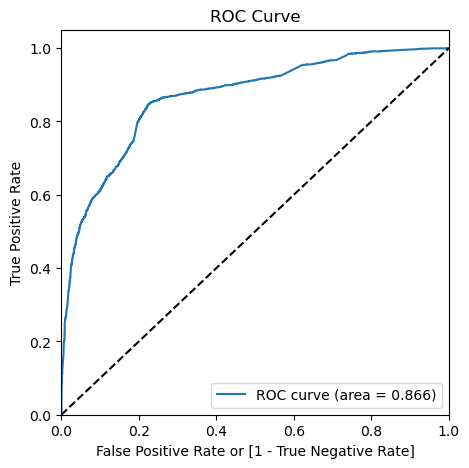

In [65]:
roc_curve(y_train_pred_final.Converted, y_train_pred_final.Prediction)

### Creating function to find out optimum probability to decide threshold

In [66]:
def PerCohorts(subset,prediction = 'prediction',target_col = 'target',bins = [0,0.02,0.04,0.06,0.08,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,1]):
    
    subset['Probability_bins'] = pd.cut(subset[prediction],bins=bins,include_lowest=True)
    temp=pd.pivot_table(data=subset,index='Probability_bins',columns=target_col,aggfunc='count').sort_index(ascending=False)
    temp.fillna(0,inplace=True)
    byrow = pd.concat([temp,temp.div(temp.sum(axis=1),axis=0)],axis=1)
    byrow.columns = ['target_0','target_1','FalsePositive','Precision']
    temp_2=temp.cumsum()
    temp_2.reset_index(inplace=True)
    temp_2.index = temp_2['Probability_bins'].apply(lambda x:f"{x.left}>=")
    del temp_2['Probability_bins']
    byrow_cum = pd.concat([temp_2,temp_2.div(temp_2.sum(axis=1),axis=0)],axis=1)
    byrow_cum.columns = ['Cumtarget_0','Cumtarget_1','CumFP','CumPrecision']
    byrow_cum['Recall'] = byrow_cum['Cumtarget_1']/byrow['target_1'].sum()
    del byrow_cum['CumFP']
    return byrow, byrow_cum

In [67]:
_,df1=PerCohorts(y_train_pred_final,'Prediction','Converted')
df1

,Cumtarget_0,Cumtarget_1,CumPrecision,Recall
Probability_bins,,,,
0.7>=,187,1312,0.875250,0.494162
0.6>=,309,1520,0.831055,0.572505
0.5>=,559,1750,0.757904,0.659134
0.4>=,852,2129,0.714190,0.801883
0.3>=,964,2249,0.699969,0.847081
0.25>=,1086,2285,0.677840,0.860640
0.2>=,1411,2331,0.622929,0.877966
0.15>=,2134,2423,0.531709,0.912618
0.1>=,3177,2613,0.451295,0.984181


### From Above output we can take 40% as cutoff point as in our problem statement Recall is most important parameter

In [68]:
y_train_pred_final['Predicted'] = y_train_pred_final.Prediction.map(lambda x: 1 if x > 0.4 else 0)

# Let's see the head
y_train_pred_final

,Converted,Prediction,Probability_bins,Predicted
0,0,0.165149,"(0.15, 0.2]",0
1,0,0.297191,"(0.25, 0.3]",0
2,0,0.222578,"(0.2, 0.25]",0
3,0,0.190169,"(0.15, 0.2]",0
4,0,0.216765,"(0.2, 0.25]",0
...,...,...,...,...
6925,0,0.163287,"(0.15, 0.2]",0
6926,0,0.049462,"(0.04, 0.06]",0
6927,1,0.962240,"(0.7, 1.0]",1
6928,0,0.174960,"(0.15, 0.2]",0


In [69]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3423  852]
 [ 526 2129]]


In [70]:
## Overall Accuracy
accuracy=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(accuracy)

0.8011544011544012


In [71]:
### Evaluating Specificity & sensitivity

# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [72]:
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)

print("Sensitivity: ",sensitivity)
print("Specificity: ",specificity)

Sensitivity:  0.8018832391713747
Specificity:  0.8007017543859649


 Cutoff Precion,racall as well as accuaracy looks promising @40%

### Making Predictions on the Test Set

In [73]:
# Scaling the test set as well using just 'transform'

X_test[cols_to_scale] =  scaler.transform(X_test[cols_to_scale])


In [74]:
## Selecting columns basis last successful fir
train_col=X_train.columns
X_test=X_test[train_col]

In [75]:
X_test

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
4608,0,0.110915,0,0,0,0,0,1,0,0,0
7935,1,0.408891,0,0,0,0,0,0,1,0,0
4043,1,0.000880,0,0,0,0,0,0,1,0,0
7821,0,0.142165,0,0,0,1,0,1,0,0,0
856,0,0.088468,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6651,0,0.717870,0,0,0,0,0,0,0,0,0
8964,0,0.083627,0,0,0,0,0,0,0,0,0
7064,0,0.548856,0,0,0,0,0,1,0,0,0
4978,0,0.494278,0,0,0,0,0,0,0,0,0


In [76]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = logreg_final.predict(sm.add_constant(X_test))

In [77]:
# Reshaping y_test_pred into an array to caoncat alongwith y_trains

y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Prediction':y_test_pred})
y_test_pred_final.head()

,Converted,Prediction
0,1,0.193555
1,0,0.092411
2,0,0.020702
3,0,0.785081
4,0,0.180411


In [78]:
y_test_pred_final['predicted'] = y_test_pred_final.Prediction.map(lambda x: 1 if x > 0.40 else 0)

In [79]:
y_test_pred_final.head()

,Converted,Prediction,predicted
0,1,0.193555,0
1,0,0.092411,0
2,0,0.020702,0
3,0,0.785081,1
4,0,0.180411,0


In [80]:
### Accuracy

accuracy_test=metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final.predicted)
print(accuracy_test)

0.8108225108225108


In [81]:
## Confusion Metrics

confusion_test = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final.predicted )
confusion_test

array([[1119,  285],
       [ 152,  754]], dtype=int64)

In [82]:
### Evaluating Specificity & sensitivity

# Let's evaluate the other metrics as well

TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [83]:
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)

print("Sensitivity: ",sensitivity)
print("Specificity: ",specificity)

Sensitivity:  0.8322295805739515
Specificity:  0.7970085470085471


#### The numbers still hold true as per our training dataset results. Hence we can say our model performance is really good